# Preparation of Smartwatch's Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlib inline

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
UsageError: Line magic function `%` not found.


### Load Data

In [2]:
full_data_watch   = pd.read_csv('..\..\..\datasets\Human_Activity\smartwatch.csv')
data_watch = full_data_watch.drop('index',axis=1)
data_watch.head(100)

,source,timestamp,values
0,battery,2017-06-29 07:45:56.262,['98']
1,accelerometer,2017-06-29 07:46:01.263,"['-0.3440857', '0.68330383', '9.967361']"
2,gravity,2017-06-29 07:46:01.324,"['-0.34131828', '0.6573288', '9.778641']"
3,linear_acceleration,2017-06-29 07:46:01.329,"['-0.018068999', '0.034808993', '-0.033065796']"
4,gyroscope,2017-06-29 07:46:01.402,"['0.0041656494', '-0.0132751465', '0.006164551']"
...,...,...,...
95,linear_acceleration,2017-06-29 07:46:41.617,"['0.004681587', '-0.0044072866', '0.0073843']"
96,pressure,2017-06-29 07:46:41.743,['968.79913']
97,heart_rate,2017-06-29 07:46:41.884,"['124.0', '1']"
98,magnetometer,2017-06-29 07:46:41.942,"['5.2505493', '22.421265', '-43.852234']"


In [3]:
report = pd.read_csv('..\..\..\datasets\Human_Activity\\report.csv')
report.sort_values(by = 'from', inplace = True)
report.head(100)

,index,activity_type,duration,from,to,comment
129,12,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,NaN
128,11,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,NaN
127,10,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,NaN
126,9,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,NaN
125,8,Took off glasses,00:08,2017-06-29 12:21,2017-06-29 12:29,NaN
...,...,...,...,...,...,...
59,0,Walk,00:19,2017-07-07 17:49,2017-07-07 18:09,NaN
71,9,Movie,00:48,2017-07-08 11:27,2017-07-08 12:16,NaN
70,8,Eat,00:16,2017-07-08 12:22,2017-07-08 12:39,NaN
69,7,Video games,00:21,2017-07-08 13:01,2017-07-08 13:22,NaN


In [4]:
report_edit = report.drop('comment',axis=1).drop('index',axis=1)
report_edit.rename(columns = {'activity_type':'activity'},inplace=True)

### Organization of labels

In [5]:
report_edit['activity'].unique()

array(['Eat', 'In vehicle', 'Walk', 'Shop', 'Took off glasses',
       'On bus stop', 'In bus', 'At home', 'Walking&party', 'Running',
       'Train', 'Work', 'In computer', 'Meeting', 'Sleep', 'Video games',
       'Picnic ', 'Watching TV', 'Phone was out of the pocket (forgot)',
       'Cooking', 'Movie', 'Pause', 'Football', 'Shopping& wearing'],
      dtype=object)

In [6]:
report_edit.groupby('activity').size()

activity
At home                                 11
Cooking                                  4
Eat                                     18
Football                                 1
In bus                                  19
In computer                             18
In vehicle                               8
Meeting                                  5
Movie                                    3
On bus stop                              1
Pause                                    4
Phone was out of the pocket (forgot)     1
Picnic                                   1
Running                                  2
Shop                                     3
Shopping& wearing                        1
Sleep                                    1
Took off glasses                         1
Train                                    9
Video games                              6
Walk                                    29
Walking&party                            2
Watching TV                              1
Wo

Split the activity to two types:
    1 - Position: At home/In bus/In vehicle/Train/Work
    2 - Activity: Cooking/Eat/Football/In computer/Meeting/Movie/Pause/Picnic/Sleep/Video games/Watching TV/Shop/Running/Walk

In addition, we will discard activities: On bus stop/Phone was out of the pocket (forgot)/Took off glasses  because there is not enough data for them

In [7]:
# Drop activities 
report_edit = report_edit[report_edit.activity != 'On bus stop']
report_edit = report_edit[report_edit.activity != 'Phone was out of the pocket (forgot)']
report_edit = report_edit[report_edit.activity != 'Took off glasses']

report_edit.loc[report_edit.activity == 'Shopping& wearing','activity'] = 'Shop'
report_edit.loc[report_edit.activity == 'Walking&party','activity'] = 'Walk'
report_edit

,activity,duration,from,to
129,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17
128,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07
127,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01
126,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40
123,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24
...,...,...,...,...
109,Walk,00:14,2017-07-12 16:40,2017-07-12 16:55
108,Meeting,01:21,2017-07-12 17:00,2017-07-12 18:21
107,In vehicle,00:05,2017-07-12 18:22,2017-07-12 18:27
106,In bus,00:31,2017-07-12 18:39,2017-07-12 19:10


In [8]:
# Map from activity to type 
dic = {'At home': 'Position','In bus': 'Position','In vehicle': 'Position','Running': 'Activity','Train': 'Position'
       ,'Walk':'Activity','Work': 'Position','Cooking':'Activity','Eat':'Activity','Football':'Activity','In computer':'Activity'
       ,'Meeting':'Activity','Movie':'Activity','Pause':'Activity','Picnic ':'Activity','Sleep':'Activity','Video games':'Activity'
       ,'Watching TV':'Activity','Shop':'Position'}
report_edit['field'] = report_edit['activity'].apply(lambda x: dic.get(x))

In [9]:
import pandas as pd

def check_for_overlaps(dataframe):
    dataframe['from'] = pd.to_datetime(dataframe['from'])
    dataframe['to'] = pd.to_datetime(dataframe['to'])

    overlaps = False

    for i, row1 in dataframe.iterrows():
        for j, row2 in dataframe.iterrows():
            if i != j:  # Avoid self-comparison
                if (row1['from'] < row2['to']) and (row1['to'] > row2['from']):
                    overlaps = True
                    print(row1)
                    print(row2)
                    print('##################')

    return overlaps

In [10]:
report_Position = report_edit[report_edit['field'] == 'Position']
if check_for_overlaps(report_Position):
    print("There are overlaps in the time intervals.")
else:
    print("There are no overlaps in the time intervals.")

<ipython-input-9-d8145a587e65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['from'] = pd.to_datetime(dataframe['from'])
<ipython-input-9-d8145a587e65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['to'] = pd.to_datetime(dataframe['to'])


There are no overlaps in the time intervals.


In [11]:
report_Activity = report_edit[report_edit['field'] == 'Activity']
if check_for_overlaps(report_Activity):
    print("There are overlaps in the time intervals.")
else:
    print("There are no overlaps in the time intervals.")

<ipython-input-9-d8145a587e65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['from'] = pd.to_datetime(dataframe['from'])
<ipython-input-9-d8145a587e65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['to'] = pd.to_datetime(dataframe['to'])


activity            Watching TV
duration                  01:59
from        2017-07-02 20:10:00
to          2017-07-02 22:10:00
field                  Activity
Name: 9, dtype: object
activity                    Eat
duration                  00:10
from        2017-07-02 21:55:00
to          2017-07-02 22:05:00
field                  Activity
Name: 8, dtype: object
##################
activity                    Eat
duration                  00:10
from        2017-07-02 21:55:00
to          2017-07-02 22:05:00
field                  Activity
Name: 8, dtype: object
activity            Watching TV
duration                  01:59
from        2017-07-02 20:10:00
to          2017-07-02 22:10:00
field                  Activity
Name: 9, dtype: object
##################
activity            In computer
duration                  01:17
from        2017-07-08 19:01:00
to          2017-07-08 20:19:00
field                  Activity
Name: 64, dtype: object
activity                    Eat
duration      

In [12]:
# Drop the overlap rows
report_withoutOverlap = report_edit.drop([8,65,113],axis=0)
report_withoutOverlap.head()

,activity,duration,from,to,field
129,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,Activity
128,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,Position
127,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,Activity
126,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,Position
123,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24,Position


In [13]:
report_Activity = report_withoutOverlap[report_withoutOverlap['field'] == 'Activity']
if check_for_overlaps(report_Activity):
    print("There are overlaps in the time intervals.")
else:
    print("There are no overlaps in the time intervals.")

<ipython-input-9-d8145a587e65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['from'] = pd.to_datetime(dataframe['from'])
<ipython-input-9-d8145a587e65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['to'] = pd.to_datetime(dataframe['to'])


There are no overlaps in the time intervals.


In [14]:
report_withoutOverlap.reset_index(drop = True, inplace=True)
report_withoutOverlap['time_delta'] = pd.to_datetime(report_withoutOverlap['to'])-pd.to_datetime(report_withoutOverlap['from'])
report_withoutOverlap.head(10)


,activity,duration,from,to,field,time_delta
0,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,Activity,0 days 00:20:00
1,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,Position,0 days 00:21:00
2,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,Activity,0 days 01:52:00
3,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,Position,0 days 00:28:00
4,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24,Position,0 days 00:22:00
5,At home,02:39,2017-06-29 13:28,2017-06-29 16:07,Position,0 days 02:39:00
6,Eat,00:08,2017-06-29 13:36,2017-06-29 13:44,Activity,0 days 00:08:00
7,In bus,00:32,2017-06-29 16:12,2017-06-29 16:44,Position,0 days 00:32:00
8,Walk,04:37,2017-06-29 16:45,2017-06-29 21:22,Activity,0 days 04:37:00
9,In bus,00:12,2017-06-29 21:24,2017-06-29 21:36,Position,0 days 00:12:00


In [15]:
report_withoutOverlap.to_csv('..\..\..\datasets\Human_Activity\\report_without_overlap.csv')

### Synchronization - aligning the features table with the labels

In [16]:
for i in range(len(report_withoutOverlap)):
    activity = report_withoutOverlap['activity'][i]
    field = report_withoutOverlap['field'][i]
    start_point = report_withoutOverlap['from'][i]
    if field.lower() == 'position':
        data_watch.loc[(np.logical_and(report_withoutOverlap['time_delta'][i]>=(pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])) , pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])>=pd.to_timedelta(0))),'position'] = activity
        data_watch.loc[(np.logical_and(report_withoutOverlap['time_delta'][i]>=(pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])) , pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])>=pd.to_timedelta(0))),'index_position'] = i
        data_watch.loc[(np.logical_and(report_withoutOverlap['time_delta'][i]>=(pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])) , pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])>=pd.to_timedelta(0))),'start_point_position'] = start_point
    else:
        data_watch.loc[(np.logical_and(report_withoutOverlap['time_delta'][i]>=(pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])) , pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])>=pd.to_timedelta(0))),'activity'] = activity
        data_watch.loc[(np.logical_and(report_withoutOverlap['time_delta'][i]>=(pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])) , pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])>=pd.to_timedelta(0))),'index_activity'] = i
        data_watch.loc[(np.logical_and(report_withoutOverlap['time_delta'][i]>=(pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])) , pd.to_datetime(report_withoutOverlap['to'][i])-pd.to_datetime(data_watch['timestamp'])>=pd.to_timedelta(0))),'start_point_activity'] = start_point

In [17]:
data_watch.head()

,source,timestamp,values,activity,index_activity,start_point_activity,position,index_position,start_point_position
0,battery,2017-06-29 07:45:56.262,['98'],NaN,NaN,NaN,NaN,NaN,NaN
1,accelerometer,2017-06-29 07:46:01.263,"['-0.3440857', '0.68330383', '9.967361']",NaN,NaN,NaN,NaN,NaN,NaN
2,gravity,2017-06-29 07:46:01.324,"['-0.34131828', '0.6573288', '9.778641']",NaN,NaN,NaN,NaN,NaN,NaN
3,linear_acceleration,2017-06-29 07:46:01.329,"['-0.018068999', '0.034808993', '-0.033065796']",NaN,NaN,NaN,NaN,NaN,NaN
4,gyroscope,2017-06-29 07:46:01.402,"['0.0041656494', '-0.0132751465', '0.006164551']",NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows that do not have labels.

In [18]:
print(data_watch['activity'].isnull().sum())
print(data_watch['position'].isnull().sum())
print(len(data_watch))
print((data_watch['activity'].isnull() & data_watch['position'].isnull()).sum())

135815
152442
200471
99744


<AxesSubplot:>

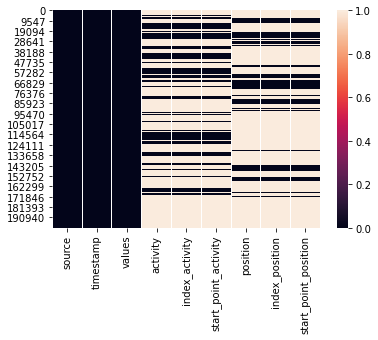

In [19]:
sns.heatmap(pd.isnull(data_watch).astype(int))

In [20]:
data_watch_with_labels = data_watch[~(data_watch['activity'].isnull() & data_watch['position'].isnull())]
data_watch_with_labels

,source,timestamp,values,activity,index_activity,start_point_activity,position,index_position,start_point_position
5016,step_detector,2017-06-29 09:57:00.288,['1.0'],Eat,0.0,2017-06-29 09:57,NaN,NaN,NaN
5017,heart_rate,2017-06-29 09:57:03.462,"['79.0', '1']",Eat,0.0,2017-06-29 09:57,NaN,NaN,NaN
5018,gyroscope,2017-06-29 09:57:08.396,"['-0.3515625', '0.68681335', '0.4768982']",Eat,0.0,2017-06-29 09:57,NaN,NaN,NaN
5019,step_detector,2017-06-29 09:57:08.402,['1.0'],Eat,0.0,2017-06-29 09:57,NaN,NaN,NaN
5020,step_counter,2017-06-29 09:57:08.404,['14.0'],Eat,0.0,2017-06-29 09:57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
172524,magnetometer,2017-07-12 19:09:58.450,"['37.09259', '32.470703', '-5.456543']",NaN,NaN,NaN,In bus,143.0,2017-07-12 18:39
172525,accelerometer,2017-07-12 19:09:58.514,"['-5.5561523', '-7.2905884', '-2.8631744']",NaN,NaN,NaN,In bus,143.0,2017-07-12 18:39
172526,gyroscope,2017-07-12 19:09:58.559,"['-0.13456726', '-0.7478943', '0.07307434']",NaN,NaN,NaN,In bus,143.0,2017-07-12 18:39
172527,battery,2017-07-12 19:09:58.579,['51'],NaN,NaN,NaN,In bus,143.0,2017-07-12 18:39


<AxesSubplot:>

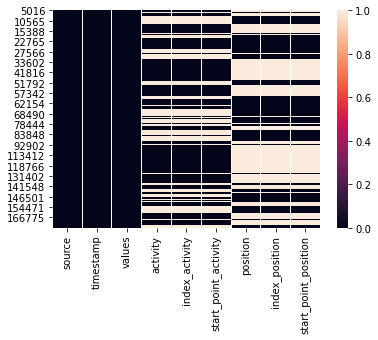

In [21]:
sns.heatmap(pd.isnull(data_watch_with_labels).astype(int))

In [22]:
# Print len of data_watch_with_labels before and after drop the Nan values
print("Num of activity before dropping unlabels rows:",len(data_watch['activity']))
print("Num of activity after dropping unlabels rows :",len(data_watch_with_labels['activity']))

Num of activity before dropping unlabels rows: 200471
Num of activity after dropping unlabels rows : 100727


### Save new data

In [23]:
data_watch_with_labels.to_csv('..\..\..\datasets\Human_Activity\data_watch_with_labels.csv')   

In [25]:
data_watch_with_labels_Act = data_watch_with_labels[~(data_watch_with_labels['activity'].isnull())]
data_watch_with_labels_Act.drop(['position'],axis=1,inplace=True)
data_watch_with_labels_Act.drop(['index_position'],axis=1,inplace=True)
data_watch_with_labels_Act.drop(['start_point_position'],axis=1,inplace=True)
data_watch_with_labels_Act.reset_index(drop = True, inplace=True)
data_watch_with_labels_Act.to_csv('..\..\..\datasets\Human_Activity\data_watch_with_labels_Act.csv')   


c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
data_watch_with_labels_Pos = data_watch_with_labels[~(data_watch_with_labels['position'].isnull())]
data_watch_with_labels_Pos.drop(['activity'],axis=1,inplace=True)
data_watch_with_labels_Pos.drop(['index_activity'],axis=1,inplace=True)
data_watch_with_labels_Pos.drop(['start_point_activity'],axis=1,inplace=True)
data_watch_with_labels_Pos.reset_index(drop = True, inplace=True)
data_watch_with_labels_Pos.to_csv('..\..\..\datasets\Human_Activity\data_watch_with_labels_Pos.csv')   

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
